In [10]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [11]:
# Read in the city scores data set
city_scores = pd.read_csv('../project1/city_scores.csv')
city_scores.head()

,City,Housing,Cost of Living,Startups,Travel Connectivity,Commute,Safety,Healthcare,Education,Environmental Quality,Taxation,Internet Access
0,"New York, NY",1.0000,2.342,10.0000,6.6750,5.51925,7.022,8.501667,8.0935,5.23375,3.9205,7.0985
1,"Los Angeles, CA",1.5275,4.556,10.0000,3.9585,3.67700,5.705,8.439667,8.6245,4.73150,4.7675,5.4965
2,"Chicago, IL",3.7020,4.766,9.5130,5.5075,4.57975,3.832,8.555000,7.9990,6.80450,4.0620,6.5995
3,"Miami, FL",3.0310,4.497,8.0225,4.1690,4.05275,4.321,8.529000,4.3945,6.29200,4.7720,5.8240
4,"Dallas, TX",5.2590,6.091,7.9395,4.7465,4.47050,4.339,8.439333,4.2840,6.69300,4.7720,6.4610


# Background:
* The primary reason taylor wants to leave California is because it's too expensive to live here.  
* The cost of living is too high. What city has the lowest cost of living?
* That's simple enough, but there are many things affecting Taylor's choice too. She wants to know if the lower cost of living means sacrificing the safety of the surrounding area.
?Is cost of living inversely correlated to a city's safety? What potential (real world) reasons would cause a low cost of living to be safe/unsafe and is this correlation strong or just moderate?
* Cost of living is not just affected by physical safety, but also associated with environmental safety and quality.
* If the environmental quality of a city is low, would that drive people away and lower the cost of living as a result?

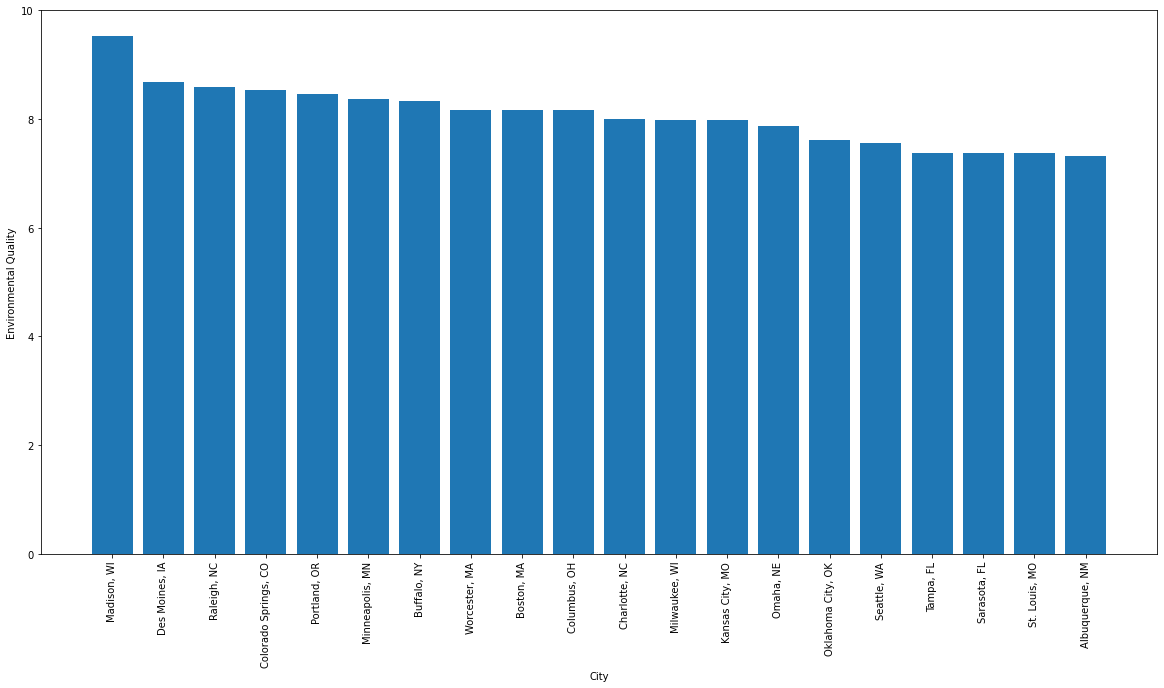

In [12]:
# Chart!
top_env = city_scores.sort_values('Environmental Quality', ascending=False).head(20)
x_axis = np.arange(len(top_env))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(20,10)).patch.set_facecolor('white')
plt.bar(top_env['City'],top_env['Environmental Quality'],align="center")
plt.xlabel('City')
plt.ylabel('Environmental Quality')
plt.xticks(tick_locations, top_env["City"], rotation="vertical")
plt.savefig("EnvironmentalQuality.png")
plt.show()

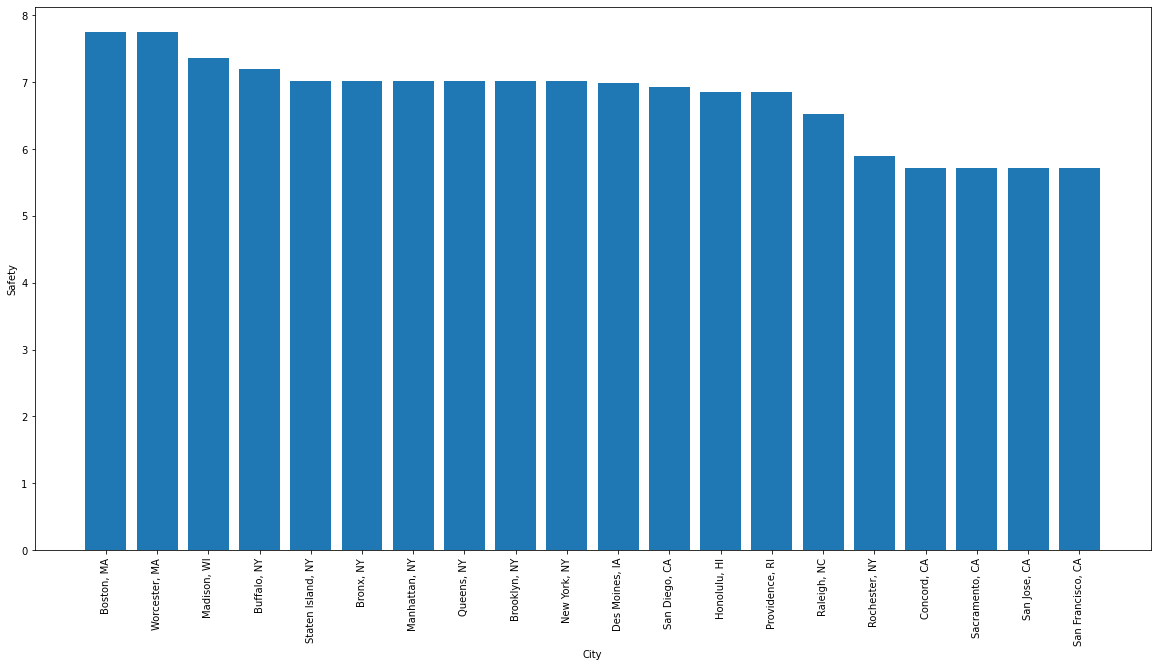

In [20]:
# Chart!
top_safe = city_scores.sort_values('Safety', ascending=False).head(20)
x_axis = np.arange(len(top_safe))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(20,10)).patch.set_facecolor('white')
plt.bar(top_safe['City'],top_safe['Safety'],align="center")
plt.xlabel('City')
plt.ylabel('Safety')
plt.xticks(tick_locations, top_safe["City"], rotation="vertical")
plt.savefig("Safety.png")
plt.show()

# Question: 
Is environmental quality related to healthcare? Do places with a better environmental quality have a better healthcare?

The correlation between healthcare and environmental quality is 0.54


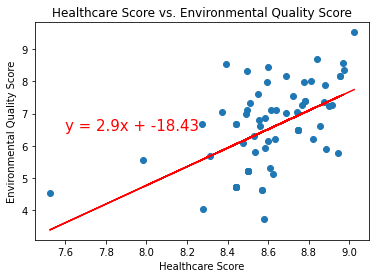

In [18]:
plt.scatter(city_scores['Healthcare'], city_scores['Environmental Quality'])
plt.xlabel("Healthcare Score")
plt.ylabel("Environmental Quality Score")
plt.title("Healthcare Score vs. Environmental Quality Score")
correlation = st.pearsonr(city_scores['Healthcare'],city_scores['Environmental Quality'])

slope, intcp, r, p, std_err = st.linregress(
    city_scores['Healthcare'],city_scores['Environmental Quality'])
reg = slope * city_scores['Healthcare'] + intcp
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intcp,2))
plt.plot(city_scores['Healthcare'], reg, color='red')
plt.annotate(line_eq,(7.6, 6.5),fontsize=15,color="red")
print(f"The correlation between healthcare and environmental quality is {round(correlation[0],2)}")

# Question:
Is housing related to cost of living?